# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=0192289556d18699867c6aaeef058bca327cf1478f84d64115349b4b78bcdd75
  Stored in directory: c:\users\mindy\appdata\local\pip\cache\wheels\eb\07\14\1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import requests
import time
import urllib
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
wkey = "5b6dc96509919ee7bd36f35c7e82e7cd"
appid = wkey
settings = {"units": "imperial", "appid": wkey}
url = f"{url}appid={wkey}&units={units}"

In [6]:
url

'http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial'

In [7]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=castro
Processing Record 2 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=ushuaia
Processing Record 3 of Set 1 | oranjestad
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=oranjestad
Processing Record 4 of Set 1 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=souillac
Processing Record 5 of Set 1 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=hasaki
Processing Record 6 of Set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=jamestown
Processing Record 7 of Set 1 | l

Processing Record 4 of Set 2 | poum
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=poum
Processing Record 5 of Set 2 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=iqaluit
Processing Record 6 of Set 2 | hue
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=hue
Processing Record 7 of Set 2 | rawson
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=rawson
Processing Record 8 of Set 2 | nalut
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=nalut
Processing Record 9 of Set 2 | noyabrsk
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=noyabrsk
Processing Record 10 of Set 2 | mareeba
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7

Processing Record 9 of Set 3 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=puerto%20del%20rosario
Processing Record 10 of Set 3 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=illoqqortoormiut
City not found...
Processing Record 11 of Set 3 | popondetta
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=popondetta
Processing Record 12 of Set 3 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=hermanus
Processing Record 13 of Set 3 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=salalah
Processing Record 14 of Set 3 | henties bay
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=henties%20bay
Processing Reco

Processing Record 11 of Set 4 | mayo
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=mayo
Processing Record 12 of Set 4 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=clyde%20river
Processing Record 13 of Set 4 | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=geraldton
Processing Record 14 of Set 4 | hutang
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=hutang
Processing Record 15 of Set 4 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=ilulissat
Processing Record 16 of Set 4 | makokou
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=makokou
Processing Record 17 of Set 4 | barawe
http://api.openweathermap.org/data/2.5/weathe

Processing Record 15 of Set 5 | naugarzan
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=naugarzan
City not found...
Processing Record 16 of Set 5 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=ribeira%20grande
Processing Record 17 of Set 5 | hastings
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=hastings
Processing Record 18 of Set 5 | yanan
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=yanan
City not found...
Processing Record 19 of Set 5 | zhoucheng
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=zhoucheng
Processing Record 20 of Set 5 | tumannyy
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=tumannyy
City not found...
Processing Recor

Processing Record 18 of Set 6 | floro
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=floro
Processing Record 19 of Set 6 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=saint-joseph
Processing Record 20 of Set 6 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=nizhneyansk
City not found...
Processing Record 21 of Set 6 | carutapera
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=carutapera
Processing Record 22 of Set 6 | pervomayskoye
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=pervomayskoye
Processing Record 23 of Set 6 | abha
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=abha
Processing Record 24 of Set 6 | faya
http://api.op

Processing Record 22 of Set 7 | hovd
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=hovd
Processing Record 23 of Set 7 | bloomfield
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=bloomfield
Processing Record 24 of Set 7 | puerto penasco
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=puerto%20penasco
Processing Record 25 of Set 7 | flinders
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=flinders
Processing Record 26 of Set 7 | soyo
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=soyo
Processing Record 27 of Set 7 | parkersburg
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=parkersburg
Processing Record 28 of Set 7 | wasilla
http://api.openweathermap.org/data

Processing Record 25 of Set 8 | ancud
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=ancud
Processing Record 26 of Set 8 | lalomanu
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=lalomanu
City not found...
Processing Record 27 of Set 8 | kapoeta
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=kapoeta
Processing Record 28 of Set 8 | rungata
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=rungata
City not found...
Processing Record 29 of Set 8 | babanusah
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=babanusah
City not found...
Processing Record 30 of Set 8 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=cherskiy
Processing Record 31 of Set 8 | port

Processing Record 29 of Set 9 | college
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=college
Processing Record 30 of Set 9 | mandla
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=mandla
Processing Record 31 of Set 9 | vila velha
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=vila%20velha
Processing Record 32 of Set 9 | kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=kangaatsiaq
Processing Record 33 of Set 9 | namibe
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=namibe
Processing Record 34 of Set 9 | moose factory
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=moose%20factory
Processing Record 35 of Set 9 | ginda
http://api.openweathermap.org/

Processing Record 33 of Set 10 | porirua
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=porirua
Processing Record 34 of Set 10 | yaan
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=yaan
Processing Record 35 of Set 10 | vao
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=vao
Processing Record 36 of Set 10 | bayan
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=bayan
Processing Record 37 of Set 10 | samalaeulu
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=samalaeulu
City not found...
Processing Record 38 of Set 10 | mehamn
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=mehamn
Processing Record 39 of Set 10 | coolum beach
http://api.openweathermap.org/data/2.5

Processing Record 36 of Set 11 | panji
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=panji
Processing Record 37 of Set 11 | jaumave
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=jaumave
Processing Record 38 of Set 11 | sorland
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=sorland
Processing Record 39 of Set 11 | dondo
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=dondo
Processing Record 40 of Set 11 | rusape
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=rusape
Processing Record 41 of Set 11 | alta
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc96509919ee7bd36f35c7e82e7cd&units=imperial&q=alta
Processing Record 42 of Set 11 | ludhiana
http://api.openweathermap.org/data/2.5/weather?appid=5b6dc9650

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:

# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)


# Show Record Count
city_data_pd.count()

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
Date          537
dtype: int64

In [9]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.79,-50.01,59.54,79,0,2.24,BR,1598654998
1,ushuaia,-54.80,-68.30,33.80,94,75,18.34,AR,1598654841
2,oranjestad,12.52,-70.03,86.00,74,40,18.34,AW,1598654998
3,souillac,-20.52,57.52,71.60,73,75,11.41,MU,1598654998
4,hasaki,35.73,140.83,86.00,84,20,5.82,JP,1598654998


In [12]:
# Read in the LAX temperature data
#temperature_df = pd.read_csv("WeatherPy.csv",encoding="utf-8",index=False)
#temperatures = temperature_df['HourlyDryBulbTemperature']

In [13]:
# Demonstrate calculating measures of central tendency
#mean_numpy = np.mean(temperatures)
#print(f"The mean temperature at the LAX airport is {mean_numpy}")

#median_numpy = np.median(temperatures)
#print(f"The median temperature at the LAX airport is {median_numpy}")

#mode_scipy = sts.mode(temperatures)
#print(f"The mode temperature at the LAX airport is {mode_scipy}")

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

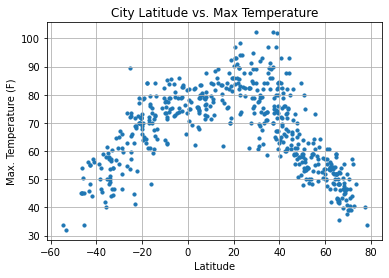

In [17]:

# Build a scatter plot for each data type
plt.scatter(city_data_pd["Lat"], city_data_pd["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure


# Show plot
plt.show()

## Latitude vs. Humidity Plot

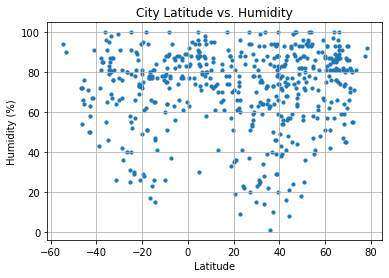

In [18]:
# Build a scatter plot for each data type
plt.scatter(city_data_pd["Lat"], city_data_pd["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

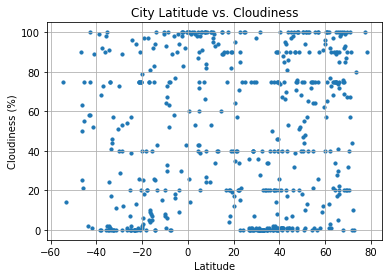

In [20]:

# Build a scatter plot for each data type
plt.scatter(city_data_pd["Lat"], city_data_pd["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the gragh


# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

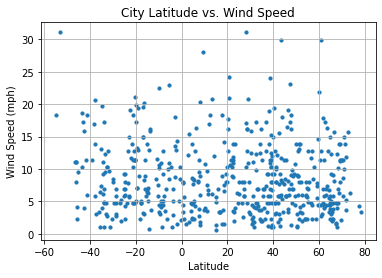

In [22]:
# Build a scatter plot for each data type
plt.scatter(city_data_pd["Lat"], city_data_pd["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure


# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


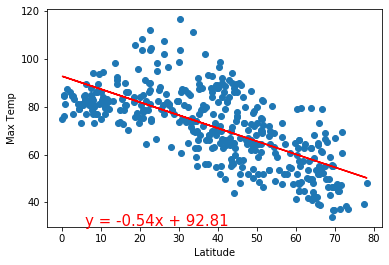

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


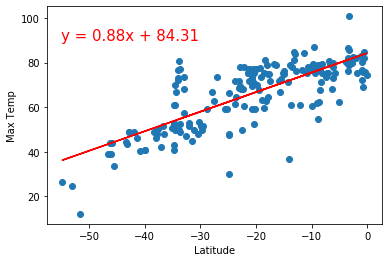

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


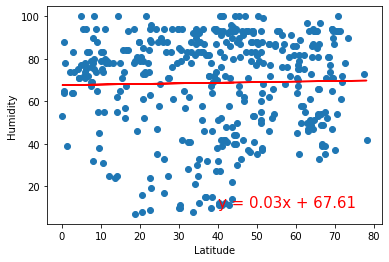

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


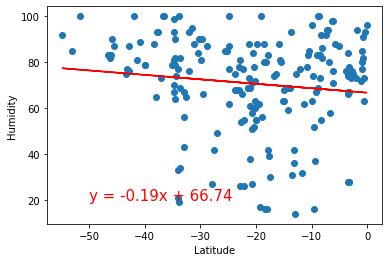

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


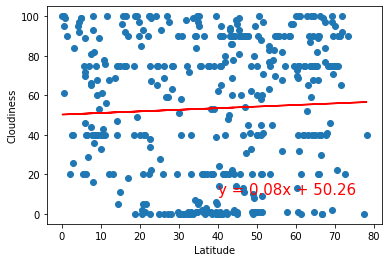

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


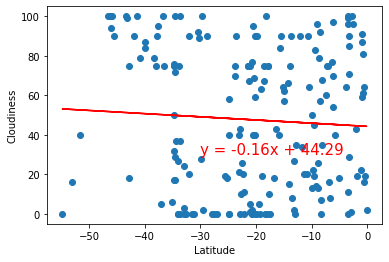

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


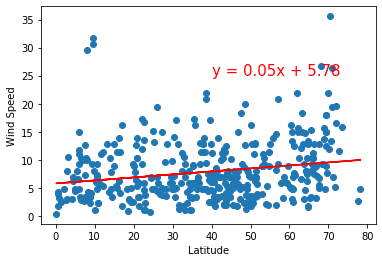

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


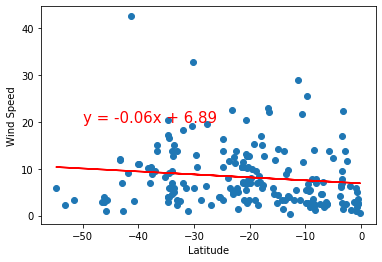